# Connect Google Drive
 Mount your google drive and add **phishing_site_url.csv** into it to use

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
!pip install selenium 

     |████████████████████████████████| 963 kB 7.0 MB/s 
     |████████████████████████████████| 138 kB 42.5 MB/s 
     |████████████████████████████████| 359 kB 49.9 MB/s 
     |████████████████████████████████| 3.6 MB 55.2 MB/s 
     |████████████████████████████████| 55 kB 4.5 MB/s 
     |████████████████████████████████| 58 kB 5.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

#Change Path 
 Update path to where you place **phishing_site_urls.csv** in your google drive

In [5]:
phish_data = pd.read_csv('/content/gdrive/MyDrive/Phishing/Data/phishing_site_urls.csv')
phish_data.head()


,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [6]:
phish_data.isnull().sum() # there is no missing values


URL      0
Label    0
dtype: int64

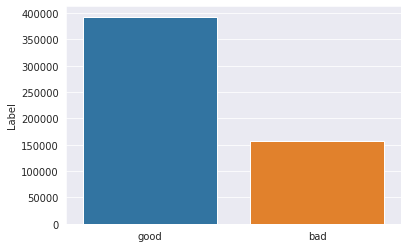

In [7]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

#visualizing target_col
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

In [8]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 2.0095520390000274 sec


In [9]:
phish_data.sample(5)

,URL,Label,text_tokenized
137409,eastlakesupport.com/images/UK/fox/dropbox/inde...,bad,"[eastlakesupport, com, images, UK, fox, dropbo..."
484348,vesivrill-paralelna1.winafordfocus.com/qdlpx02...,bad,"[vesivrill, paralelna, winafordfocus, com, qdl..."
406618,nosorigines.qc.ca/genealogielistfirstname.aspx...,good,"[nosorigines, qc, ca, genealogielistfirstname,..."
292419,bjhughes.org/hardycem7.html,good,"[bjhughes, org, hardycem, html]"
78071,www.rebolforces.com/view-faq.html,good,"[www, rebolforces, com, view, faq, html]"


In [10]:
stemmer = SnowballStemmer("english") # choose a language

print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

phish_data.sample(5)

Getting words stemmed ...
Time taken 47.19507912900008 sec


,URL,Label,text_tokenized,text_stemmed
18448,esxcc.com/js/index.htm?us.battle.net/login/en/...,bad,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, l..."
237419,scottfalco.deviantart.com/,good,"[scottfalco, deviantart, com]","[scottfalco, deviantart, com]"
12789,login.payspl.com/cms_online/webscr=H4dqUOL_LLG...,bad,"[login, payspl, com, cms, online, webscr, H, d...","[login, payspl, com, cms, onlin, webscr, h, dq..."
509333,dolittlachedt.ru/sliva/admin.php,bad,"[dolittlachedt, ru, sliva, admin, php]","[dolittlachedt, ru, sliva, admin, php]"
115618,stjudebossier.org/images/stc/mesaj.htm,bad,"[stjudebossier, org, images, stc, mesaj, htm]","[stjudebossi, org, imag, stc, mesaj, htm]"


In [11]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.21630548299992824 sec


In [12]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [13]:
#create cv object
cv = CountVectorizer()

In [14]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray 

In [15]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)


In [16]:
pipeline_ls.fit(trainX,trainY)


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)>)),
                ('logisticregression', LogisticRegression())])

In [17]:
pipeline_ls.score(testX,testY) 


0.9660033348624187

Training Accuracy : 0.980381496520707
Testing Accuracy : 0.9660033348624187

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36703
        Good       0.99      0.97      0.98    100634

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


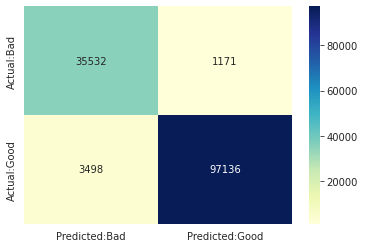

In [18]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [19]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))
